In [8]:
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
model_name = "random_forest"
display_name = "Random Forest"

In [11]:
y_test = pd.read_csv('y_test.csv')
file = open("Selection Methods","rb")
sel_methods = np.load(file)

In [12]:
def get_best_model(method, args, _cv, is_sample):
    sample_string = ''
    if (is_sample):
        sample_string = '_sample'
    y_train = pd.read_csv('y_train'+ sample_string + '.csv')    
    method_string = method
    if (method == ''):
        method_string = "no feature selection"
    print('\n\nRunning cross fold validation for',display_name,'with',method_string,'dataset')
    x_train = pd.read_csv('x_train' + method + sample_string + '.csv').values
    x_test = pd.read_csv('x_test' + method + '.csv').values
    pipe = Pipeline([('clf', RandomForestRegressor())])
    grid = GridSearchCV(pipe, args, cv = _cv, verbose = 1, scoring = 'r2', n_jobs=6)
    grid.fit(x_train, y_train.values.ravel())
    print('\nBest score for',display_name,'with',method_string,"dataset:",grid.best_score_)
    best_args = grid.best_estimator_.get_params()
    print('\nBest hyperparameters for',display_name,'with',method_string,'dataset:')
    for arg in best_args:
        print(arg,":",best_args[arg])
    y_test_predict = grid.predict(x_test)
    mse = mean_squared_error(y_test,y_test_predict)
    mae = mean_absolute_error(y_test,y_test_predict)
    r2 = r2_score(y_test,y_test_predict)
    print('\nPrediction scores for',display_name,'using',method_string,':')
    print('Mean Squared error:',mse)
    print('Mean Absolute error:',mae)
    print('R^2:',r2)
    return grid.best_estimator_,grid.best_score_,mse,mae,r2

In [13]:
def save_model(model,method):
    with open('CrimeGUI/Models/'+model_name+method,'wb') as file:
        pickle.dump(model,file)

In [14]:
print(sel_methods)

['_f_regression' '_chi2' '_adaboost' '_equal_crime_and_business'
 '_all_business']


<h3>F-Regression feature selected dataset<h3>

In [20]:
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','mae'),
        'clf__n_estimators':(100,200,300,500,1000),
        'clf__min_samples_split':(2,5,10),
        'clf__max_depth': (10,20,50,100,None),
        'clf__min_samples_leaf':(1,2,5,10),
        'clf__max_features':('sqrt','log2'),
        'clf__random_state':([7])}

In [21]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _f_regression dataset
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  5.7min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  9.6min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 14.4min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 20.4min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 85.7min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 375.6min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 712.7min
[Parallel(n_jobs=6)]: Done 6000 out of 6000 | elapsed: 1085.1min finished



Best score for Random Forest with _f_regression dataset: 0.7502999963419127

Best hyperparameters for Random Forest with _f_regression dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=1000, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=1000, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 10
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 10
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 1000
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _f_regression :
Mean Squared error: 4.88583

In [30]:
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','mae'),
        'clf__n_estimators':(800,1000),
        'clf__min_samples_split':(2,4,6),
        'clf__max_depth': (10,20),
        'clf__min_samples_leaf':(5,10),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7]),
        'clf__min_impurity_decrease':(arange(0,1,0.2)),
        'clf__ccp_alpha':(arange(0,1,0.2))}

In [31]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _f_regression dataset
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   36.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 82.4min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 200.9min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 205.9min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 409.9min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 498.0min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 630.9min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 830.0min
[Parallel(n_jobs=6)]: Done 6000 out of 6000 | elapsed: 1028.4min finished



Best score for Random Forest with _f_regression dataset: 0.7502999963419127

Best hyperparameters for Random Forest with _f_regression dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=1000, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=1000, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 10
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 10
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 1000
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _f_regression :
Mean Squared error: 4.88583

In [35]:
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(1000,1500,2000,3000,4000,5000),
        'clf__min_samples_split':([2]),
        'clf__max_depth': ([10]),
        'clf__min_samples_leaf':([10]),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7]),
        'clf__min_impurity_decrease':([0]),
        'clf__ccp_alpha':([0])}

In [36]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _f_regression dataset
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  5.8min
[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed: 13.3min finished



Best score for Random Forest with _f_regression dataset: 0.7437620252713557

Best hyperparameters for Random Forest with _f_regression dataset:
memory : None
steps : [('clf', RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features='sqrt',
                      min_impurity_decrease=0, min_samples_leaf=10,
                      n_estimators=4000, random_state=7))]
verbose : False
clf : RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features='sqrt',
                      min_impurity_decrease=0, min_samples_leaf=10,
                      n_estimators=4000, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0
clf__criterion : mse
clf__max_depth : 10
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0
clf__min_impurity_split : None
clf__min_samples_leaf : 10
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 4000
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbos

In [38]:
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(1000,1500,2000,3000,4000,5000),
        'clf__min_samples_split':([2]),
        'clf__max_depth': ([10]),
        'clf__min_samples_leaf':([10]),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7]),
        'clf__min_impurity_decrease':([0]),
        'clf__ccp_alpha':([0])}

In [39]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _f_regression dataset
Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 10.6min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 51.7min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 118.6min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 241.4min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 418.0min
[Parallel(n_jobs=6)]: Done 1620 out of 1620 | elapsed: 579.1min finished



Best score for Random Forest with _f_regression dataset: 0.7437651175140028

Best hyperparameters for Random Forest with _f_regression dataset:
memory : None
steps : [('clf', RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features='sqrt',
                      min_impurity_decrease=0, min_samples_leaf=10,
                      n_estimators=4500, random_state=7))]
verbose : False
clf : RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features='sqrt',
                      min_impurity_decrease=0, min_samples_leaf=10,
                      n_estimators=4500, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0
clf__criterion : mse
clf__max_depth : 10
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0
clf__min_impurity_split : None
clf__min_samples_leaf : 10
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 4500
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbos

In [10]:
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':([4500]),
        'clf__min_samples_split':([2]),
        'clf__max_depth': ([10]),
        'clf__min_samples_leaf':([10]),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7]),
        'clf__min_impurity_decrease':([0]),
        'clf__ccp_alpha':([0])}

In [11]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _f_regression dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  3.4min finished



Best score for Random Forest with _f_regression dataset: 0.7437651175140028

Best hyperparameters for Random Forest with _f_regression dataset:
memory : None
steps : [('clf', RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features='sqrt',
                      min_impurity_decrease=0, min_samples_leaf=10,
                      n_estimators=4500, random_state=7))]
verbose : False
clf : RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features='sqrt',
                      min_impurity_decrease=0, min_samples_leaf=10,
                      n_estimators=4500, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0
clf__criterion : mse
clf__max_depth : 10
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0
clf__min_impurity_split : None
clf__min_samples_leaf : 10
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 4500
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbos

In [31]:
#alpha and impurity dont affect outcome, attempt to fine tune other hyperparameters
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(4300,4400,4500,4600,4700),
        'clf__min_samples_split':(2,3,4,5),
        'clf__max_depth': (8,9,10,11,12),
        'clf__min_samples_leaf':(8,9,10,11,12),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [32]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _f_regression dataset
Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 12.3min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 60.7min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 141.1min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 253.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 388.8min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 551.7min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 744.7min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 973.0min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 1267.2min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 1619.2min
[Parallel(n_jobs=6)]: Done 5000 out of 5000 | elapsed: 1623.5min finished



Best score for Random Forest with _f_regression dataset: 0.7439499152766238

Best hyperparameters for Random Forest with _f_regression dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=11, max_features='sqrt', min_samples_leaf=12,
                      n_estimators=4700, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=11, max_features='sqrt', min_samples_leaf=12,
                      n_estimators=4700, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 11
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 12
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 4700
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _f_regression :
Mean Squared error: 4.79386

In [41]:
#finer tuning of hyperparameters
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(4650,4700,4750),
        'clf__min_samples_split':(2,3),
        'clf__max_depth': (11,12,13,14),
        'clf__min_samples_leaf':(12,13,14,15),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [42]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _f_regression dataset
Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 13.8min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 63.9min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 149.3min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 276.0min
[Parallel(n_jobs=6)]: Done 960 out of 960 | elapsed: 338.1min finished



Best score for Random Forest with _f_regression dataset: 0.7439499152766238

Best hyperparameters for Random Forest with _f_regression dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=11, max_features='sqrt', min_samples_leaf=12,
                      n_estimators=4700, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=11, max_features='sqrt', min_samples_leaf=12,
                      n_estimators=4700, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 11
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 12
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 4700
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _f_regression :
Mean Squared error: 4.79386

In [49]:
# parameters stable, model saved
save_model(f_reg_model,sel_methods[0])

<h3>Chi-Squared feature selected dataset<h3>

In [10]:
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','mae'),
        'clf__n_estimators':(100,500,1000),
        'clf__min_samples_split':(2,5,10),
        'clf__max_depth': (10,20,30),
        'clf__min_samples_leaf':(2,5,10),
        'clf__max_features':('sqrt','log2'),
        'clf__random_state':([7])}

In [11]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _chi2 dataset
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   18.3s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 143.2min
[Parallel(n_jobs=6)]: Done 1620 out of 1620 | elapsed: 269.4min finished



Best score for Random Forest with _chi2 dataset: 0.7478509410708918

Best hyperparameters for Random Forest with _chi2 dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=1000, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=1000, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 10
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 2
clf__min_samples_split : 10
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 1000
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _chi2 :
Mean Squa

In [8]:
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','mae'),
        'clf__n_estimators':(1000,1500,2000,3000,4000,5000),
        'clf__min_samples_split':(5,10,20),
        'clf__max_depth': (5,10,20),
        'clf__min_samples_leaf':(2,5),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [9]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _chi2 dataset
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   52.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 14.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 374.7min
[Parallel(n_jobs=6)]: Done 1080 out of 1080 | elapsed: 900.8min finished



Best score for Random Forest with _chi2 dataset: 0.748091631387157

Best hyperparameters for Random Forest with _chi2 dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=20, n_estimators=4000, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=20, n_estimators=4000, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 10
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 2
clf__min_samples_split : 20
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 4000
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _chi2 :
Mean Squar

In [15]:
#explore impurity decrease and alpha
is_sample = False
num_folds = 5
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(3500,4000,4500),
        'clf__min_samples_split':([20]),
        'clf__max_depth': ([10]),
        'clf__min_samples_leaf':(2,5),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7]),
        'clf__min_impurity_decrease':(arange(0,1,0.2)),
        'clf__ccp_alpha':(arange(0,1,0.2))}

In [16]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _chi2 dataset
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  7.9min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 27.1min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 59.6min
[Parallel(n_jobs=6)]: Done 750 out of 750 | elapsed: 102.7min finished



Best score for Random Forest with _chi2 dataset: 0.7388470622613086

Best hyperparameters for Random Forest with _chi2 dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=20, n_estimators=4000, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=20, n_estimators=4000, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 10
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 5
clf__min_samples_split : 20
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 4000
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _chi2 :
Mean Squa

In [33]:
#alpha and impurity dont affect outcome, attempt to fine tune other hyperparameters
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(3800,3900,4000,4100,4200),
        'clf__min_samples_split':(18,19,20,21,22),
        'clf__max_depth': (8,9,10,11,12),
        'clf__min_samples_leaf':(3,4,5,6,7),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [34]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _chi2 dataset
Fitting 10 folds for each of 625 candidates, totalling 6250 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 10.4min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 44.8min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 104.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 184.0min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 279.8min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 403.4min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 546.3min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 720.8min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 926.6min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 1175.7min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 1469.9min
[Parallel(n_jobs=6)]: Done 6250 out of 6250 | elapsed: 1527.5min finished



Best score for Random Forest with _chi2 dataset: 0.740039790321543

Best hyperparameters for Random Forest with _chi2 dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=21, n_estimators=4000, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=21, n_estimators=4000, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 12
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 3
clf__min_samples_split : 21
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 4000
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _chi2 :
Mean Squar

In [43]:
#fine tuning of hyperparameters
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(3950,4000,4050,4100),
        'clf__min_samples_split':(21,22,23),
        'clf__max_depth': (12,13,14),
        'clf__min_samples_leaf':(2,3,4),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [44]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _chi2 dataset
Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 11.0min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 49.9min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 115.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 224.3min
[Parallel(n_jobs=6)]: Done 1080 out of 1080 | elapsed: 313.6min finished



Best score for Random Forest with _chi2 dataset: 0.740039790321543

Best hyperparameters for Random Forest with _chi2 dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=21, n_estimators=4000, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=21, n_estimators=4000, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 12
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 3
clf__min_samples_split : 21
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 4000
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _chi2 :
Mean Squar

In [50]:
#parameters stabalised, model saved
save_model(chi2_model,sel_methods[1])

<h3>AdaBoost feature selected dataset<h3>

In [12]:
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','mae'),
        'clf__n_estimators':(100,500,1000),
        'clf__min_samples_split':(2,5,10),
        'clf__max_depth': (10,20,30),
        'clf__min_samples_leaf':(2,5,10),
        'clf__max_features':('sqrt','log2'),
        'clf__random_state':([7])}

In [13]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _adaboost dataset
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   18.7s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  8.0min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 188.3min
[Parallel(n_jobs=6)]: Done 1620 out of 1620 | elapsed: 360.6min finished



Best score for Random Forest with _adaboost dataset: 0.7534699077776505

Best hyperparameters for Random Forest with _adaboost dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=10,
                      random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=10,
                      random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 20
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 10
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 100
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _adaboost :
Mean Squared error: 4.92464308363576
Mean Absolute error: 1.3942635864105912
R

In [8]:
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','mae'),
        'clf__n_estimators':(50,100,150),
        'clf__min_samples_split':(2,5,10),
        'clf__max_depth': (10,20,30),
        'clf__min_samples_leaf':(2,5,10,20),
        'clf__max_features':('sqrt','log2'),
        'clf__random_state':([7])}

In [9]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _adaboost dataset
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   19.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   46.7s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 14.9min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 60.7min
[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed: 91.2min finished



Best score for Random Forest with _adaboost dataset: 0.7536951351693331

Best hyperparameters for Random Forest with _adaboost dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=150, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=150, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 10
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 10
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 150
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _adaboost :
Mean Squared error: 4.913666041164316
Mean

In [17]:
#explore impurity decrease and alpha
is_sample = True
num_folds = 5
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(150,200),
        'clf__min_samples_split':(2,5),
        'clf__max_depth': (10,20),
        'clf__min_samples_leaf':(5,10,20),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7]),
        'clf__min_impurity_decrease':(arange(0,1,0.2)),
        'clf__ccp_alpha':(arange(0,1,0.2))}

In [18]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _adaboost dataset
Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    6.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   22.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   51.8s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 3000 out of 3000 | elapsed:  5.5min finished



Best score for Random Forest with _adaboost dataset: 0.7536951351693331

Best hyperparameters for Random Forest with _adaboost dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=150, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=150, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 10
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 10
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 150
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _adaboost :
Mean Squared error: 4.913666041164316
Mean

In [35]:
#alpha and impurity dont affect outcome, attempt to fine tune other hyperparameters
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(130,140,150,160,170),
        'clf__min_samples_split':(2,3,4,5),
        'clf__max_depth': (8,9,10,11,12),
        'clf__min_samples_leaf':(8,9,10,11,12),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [36]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _adaboost dataset
Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   28.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.6min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  8.2min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 13.0min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 19.0min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 26.3min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 35.1min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 45.4min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 57.3min
[Parallel(n_jobs=6)]: Done 5000 out of 5000 | elapsed: 57.5min finished



Best score for Random Forest with _adaboost dataset: 0.7456802428990673

Best hyperparameters for Random Forest with _adaboost dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=11, max_features='sqrt', min_samples_leaf=9,
                      n_estimators=170, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=11, max_features='sqrt', min_samples_leaf=9,
                      n_estimators=170, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 11
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 9
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 170
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _adaboost :
Mean Squared error: 4.788526091075516
Mean Ab

In [45]:
#fine tuning of hyperparameters
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(165,170,175,180,185),
        'clf__min_samples_split':(2,3,4),
        'clf__max_depth': (10,11,12,13),
        'clf__min_samples_leaf':(7,8,9,10,11),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [46]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _adaboost dataset
Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   37.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  6.6min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 11.7min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 18.5min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 27.3min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 38.2min
[Parallel(n_jobs=6)]: Done 3000 out of 3000 | elapsed: 47.7min finished



Best score for Random Forest with _adaboost dataset: 0.746065624980193

Best hyperparameters for Random Forest with _adaboost dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_leaf=9,
                      n_estimators=175, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_leaf=9,
                      n_estimators=175, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 13
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 9
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 175
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _adaboost :
Mean Squared error: 4.779151958233372
Mean Abs

In [51]:
# further fine tuning of hyperparameters
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(171,172,173,174,175,176,177,178,179),
        'clf__min_samples_split':(2,3,4),
        'clf__max_depth': (13,14,15,16),
        'clf__min_samples_leaf':(7,8,9,10,11),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [52]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _adaboost dataset
Fitting 10 folds for each of 540 candidates, totalling 5400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   44.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  7.2min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 12.7min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 19.8min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 28.8min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 39.4min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 51.8min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 66.0min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 82.2min
[Parallel(n_jobs=6)]: Done 5400 out of 5400 | elapsed: 89.2min finished



Best score for Random Forest with _adaboost dataset: 0.746065624980193

Best hyperparameters for Random Forest with _adaboost dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_leaf=9,
                      n_estimators=175, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_leaf=9,
                      n_estimators=175, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 13
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 9
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 175
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _adaboost :
Mean Squared error: 4.779151958233372
Mean Abs

In [53]:
#hyperparameters stable, model saved
save_model(ada_model,sel_methods[2])

<h3>Equal business and crime feature selected dataset<h3>

In [14]:
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','mae'),
        'clf__n_estimators':(100,500,1000),
        'clf__min_samples_split':(2,5,10),
        'clf__max_depth': (10,20,30),
        'clf__min_samples_leaf':(2,5,10),
        'clf__max_features':('sqrt','log2'),
        'clf__random_state':([7])}

In [15]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _equal_crime_and_business dataset
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   19.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  8.3min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 200.8min
[Parallel(n_jobs=6)]: Done 1620 out of 1620 | elapsed: 386.1min finished



Best score for Random Forest with _equal_crime_and_business dataset: 0.7445835567793088

Best hyperparameters for Random Forest with _equal_crime_and_business dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=500, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=500, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 10
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 10
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 500
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _equal_crime_and_busin

In [19]:
#explore impurity decrease and alpha
is_sample = True
num_folds = 5
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(400,500,600),
        'clf__min_samples_split':(2,5),
        'clf__max_depth': (10,20),
        'clf__min_samples_leaf':(10,20),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7]),
        'clf__min_impurity_decrease':(arange(0,1,0.2)),
        'clf__ccp_alpha':(arange(0,1,0.2))}

In [20]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _equal_crime_and_business dataset
Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   18.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  6.4min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  9.2min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 12.6min
[Parallel(n_jobs=6)]: Done 3000 out of 3000 | elapsed: 15.4min finished



Best score for Random Forest with _equal_crime_and_business dataset: 0.7446844125063732

Best hyperparameters for Random Forest with _equal_crime_and_business dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=600, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=600, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 10
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 10
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 600
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _equal_crime_and_busin

In [37]:
#alpha and impurity dont affect outcome, attempt to fine tune other hyperparameters
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(600,700,800),
        'clf__min_samples_split':(2,3,4,5),
        'clf__max_depth': (8,9,10,11,12),
        'clf__min_samples_leaf':(8,9,10,11,12),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [38]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _equal_crime_and_business dataset
Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  9.1min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 21.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 41.1min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 65.8min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 96.5min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 133.5min
[Parallel(n_jobs=6)]: Done 3000 out of 3000 | elapsed: 167.4min finished



Best score for Random Forest with _equal_crime_and_business dataset: 0.7392438369753024

Best hyperparameters for Random Forest with _equal_crime_and_business dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=12,
                      n_estimators=600, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=12,
                      n_estimators=600, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 12
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 12
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 600
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _equal_crime_and_busin

In [47]:
# hyperparameters stable, model saved
save_model(equal_model,sel_methods[3])

<h3>Business only feature selected dataset<h3>

In [9]:
is_sample = True
num_folds = 5
args = {'clf__criterion':('mse','mae'),
        'clf__n_estimators':(100,500,1000),
        'clf__min_samples_split':(2,5,10),
        'clf__max_depth': (10,20,30),
        'clf__min_samples_leaf':(2,5,10),
        'clf__max_features':('sqrt','log2'),
        'clf__random_state':([7])}

In [10]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _all_business dataset
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   19.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  7.4min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 168.1min
[Parallel(n_jobs=6)]: Done 1620 out of 1620 | elapsed: 320.7min finished



Best score for Random Forest with _all_business dataset: 0.6399794950677886

Best hyperparameters for Random Forest with _all_business dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1000, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1000, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 20
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 2
clf__min_samples_split : 5
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 1000
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _all

In [24]:
is_sample = True
num_folds = 5
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(1000,1500,2000,2500),
        'clf__min_samples_split':(2,5,10),
        'clf__max_depth': (10,20,30),
        'clf__min_samples_leaf':(2,5,10),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [25]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _all_business dataset
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  4.6min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 13.2min
[Parallel(n_jobs=6)]: Done 540 out of 540 | elapsed: 16.4min finished



Best score for Random Forest with _all_business dataset: 0.6402218891338787

Best hyperparameters for Random Forest with _all_business dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=2000, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=2000, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 20
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 2
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 2000
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _all_business :
Mean Squared error: 6.74207593

In [39]:
# explore alpha and min impurity
is_sample = True
num_folds = 5
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':(1500,2000,2500),
        'clf__min_samples_split':(2,5),
        'clf__max_depth': (10,20,30),
        'clf__min_samples_leaf':(2,5),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7]),
        'clf__min_impurity_decrease':(arange(0,1,0.2)),
        'clf__ccp_alpha':(arange(0,1,0.2))}

In [40]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _all_business dataset
Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  8.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 15.3min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 24.1min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 35.3min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 49.5min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 63.9min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 81.4min
[Parallel(n_jobs=6)]: Done 4500 out of 4500 | elapsed: 90.4min finished



Best score for Random Forest with _all_business dataset: 0.6402218891338787

Best hyperparameters for Random Forest with _all_business dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=2000, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=2000, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 20
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 2
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 2000
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _all_business :
Mean Squared error: 6.74207593

In [48]:
#hyperparameters stable model saved
save_model(bus_model,sel_methods[4])

<h3>Visualise scores<h3>

In [23]:
#finer tuning of hyperparameters
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':([4700]),
        'clf__min_samples_split':([2]),
        'clf__max_depth': ([12]),
        'clf__min_samples_leaf':([12]),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [24]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _f_regression dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  4.0min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  4.0min finished



Best score for Random Forest with _f_regression dataset: 0.7438673619082524

Best hyperparameters for Random Forest with _f_regression dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=12,
                      n_estimators=4700, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=12,
                      n_estimators=4700, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 12
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 12
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 4700
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _f_regression :
Mean Squared error: 4.79461

In [25]:
#fine tuning of hyperparameters
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':([4000]),
        'clf__min_samples_split':([21]),
        'clf__max_depth': ([12]),
        'clf__min_samples_leaf':([3]),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [26]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _chi2 dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  2.8min finished



Best score for Random Forest with _chi2 dataset: 0.740039790321543

Best hyperparameters for Random Forest with _chi2 dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=21, n_estimators=4000, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=21, n_estimators=4000, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 12
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 3
clf__min_samples_split : 21
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 4000
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _chi2 :
Mean Squar

In [27]:
# further fine tuning of hyperparameters
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':([175]),
        'clf__min_samples_split':([2]),
        'clf__max_depth': ([13]),
        'clf__min_samples_leaf':([9]),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [28]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _adaboost dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    9.9s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    9.9s finished



Best score for Random Forest with _adaboost dataset: 0.746065624980193

Best hyperparameters for Random Forest with _adaboost dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_leaf=9,
                      n_estimators=175, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_leaf=9,
                      n_estimators=175, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 13
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 9
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 175
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _adaboost :
Mean Squared error: 4.779151958233372
Mean Abs

In [29]:
#alpha and impurity dont affect outcome, attempt to fine tune other hyperparameters
is_sample = False
num_folds = 10
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':([600]),
        'clf__min_samples_split':([2]),
        'clf__max_depth': ([12]),
        'clf__min_samples_leaf':([12]),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7])}

In [30]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _equal_crime_and_business dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   33.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   33.0s finished



Best score for Random Forest with _equal_crime_and_business dataset: 0.7392438369753024

Best hyperparameters for Random Forest with _equal_crime_and_business dataset:
memory : None
steps : [('clf', RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=12,
                      n_estimators=600, random_state=7))]
verbose : False
clf : RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=12,
                      n_estimators=600, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0.0
clf__criterion : mse
clf__max_depth : 12
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0.0
clf__min_impurity_split : None
clf__min_samples_leaf : 12
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 600
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose : 0
clf__warm_start : False

Prediction scores for Random Forest using _equal_crime_and_busin

In [31]:
# explore alpha and min impurity
is_sample = True
num_folds = 5
args = {'clf__criterion':(['mse']),
        'clf__n_estimators':([2000]),
        'clf__min_samples_split':([2]),
        'clf__max_depth': ([20]),
        'clf__min_samples_leaf':([2]),
        'clf__max_features':(['sqrt']),
        'clf__random_state':([7]),
        'clf__min_impurity_decrease':([0]),
        'clf__ccp_alpha':([0])}

In [32]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Random Forest with _all_business dataset
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:   14.9s finished



Best score for Random Forest with _all_business dataset: 0.6402218891338787

Best hyperparameters for Random Forest with _all_business dataset:
memory : None
steps : [('clf', RandomForestRegressor(ccp_alpha=0, max_depth=20, max_features='sqrt',
                      min_impurity_decrease=0, min_samples_leaf=2,
                      n_estimators=2000, random_state=7))]
verbose : False
clf : RandomForestRegressor(ccp_alpha=0, max_depth=20, max_features='sqrt',
                      min_impurity_decrease=0, min_samples_leaf=2,
                      n_estimators=2000, random_state=7)
clf__bootstrap : True
clf__ccp_alpha : 0
clf__criterion : mse
clf__max_depth : 20
clf__max_features : sqrt
clf__max_leaf_nodes : None
clf__max_samples : None
clf__min_impurity_decrease : 0
clf__min_impurity_split : None
clf__min_samples_leaf : 2
clf__min_samples_split : 2
clf__min_weight_fraction_leaf : 0.0
clf__n_estimators : 2000
clf__n_jobs : None
clf__oob_score : False
clf__random_state : 7
clf__verbose :

In [33]:
training_scores = [f_reg_train_score, chi2_train_score, ada_train_score, equal_train_score, bus_train_score]
mse_scores = [f_reg_mse, chi2_mse, ada_mse, equal_mse, bus_mse]
mae_scores = [f_reg_mae, chi2_mae, ada_mae, equal_mae, bus_mae]
r2_scores = [f_reg_r2, chi2_r2, ada_r2, equal_r2, bus_r2]
datasets = ["F-Regression","Chi-Squared","AdaBoost","Equal Business\nand Crime","All Business"]
y_select = np.arange(len(datasets))

<BarContainer object of 5 artists>

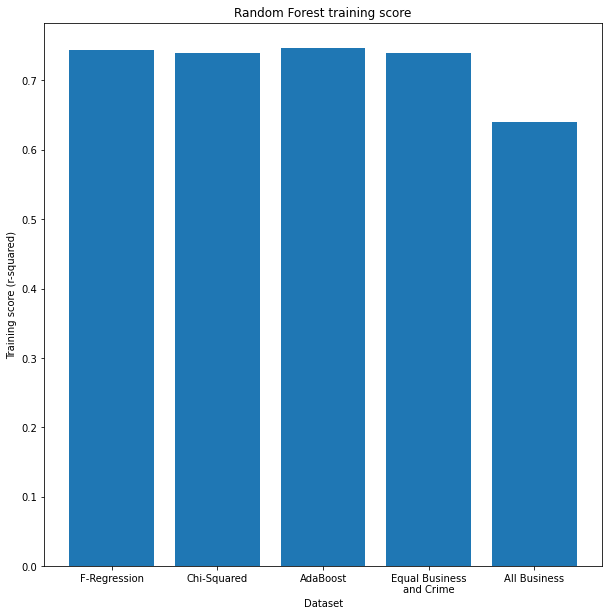

In [34]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " training score")
plt.xlabel("Dataset")
plt.ylabel("Training score (r-squared)")
plt.bar(y_select, training_scores)

<BarContainer object of 5 artists>

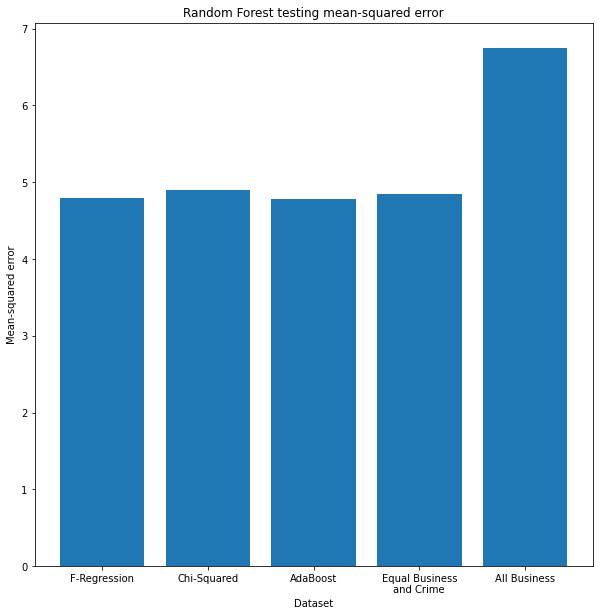

In [35]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing mean-squared error")
plt.xlabel("Dataset")
plt.ylabel("Mean-squared error")
plt.bar(y_select, mse_scores)

<BarContainer object of 5 artists>

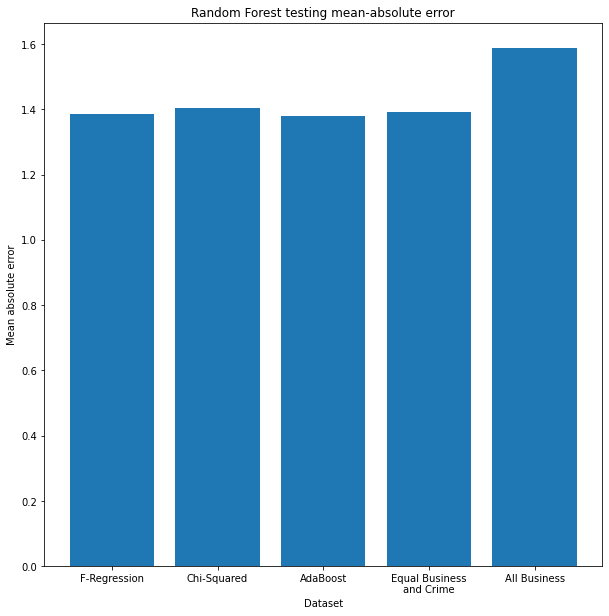

In [36]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing mean-absolute error")
plt.xlabel("Dataset")
plt.ylabel("Mean absolute error")
plt.bar(y_select, mae_scores)

<BarContainer object of 5 artists>

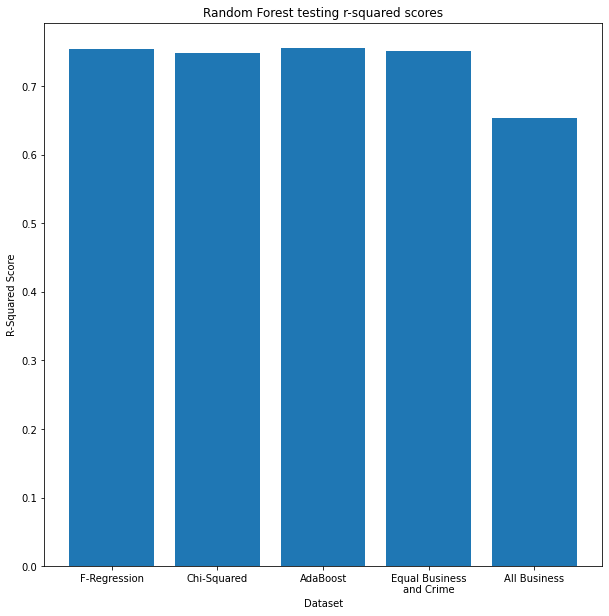

In [37]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title(display_name + " testing r-squared scores")
plt.xlabel("Dataset")
plt.ylabel("R-Squared Score")
plt.bar(y_select, r2_scores)